# Telangana Crop Health Challenge

## Problem Statement:

This competition aims to address the critical challenge of accurately estimating crop yield in Telangana, India, by developing a machine learning model that classifies crop health conditions. By effectively classifying crop health, this model will empower farmers and government agencies to proactively identify and address potential issues such as pests, diseases, and environmental stresses. This proactive approach will ultimately contribute to improved crop yield, enhanced food security, and more sustainable agricultural practices in the region.


## Data collection
The data Was provided by Zindi Africa https://zindi.africa/


## Variable definition
- **FarmID:**Unique identifier of the farm.
- **Crop:** Name of the crop corresponding to this observation.
- **State:** Name of the state in which the farm is located.
- **District:** Name of the district in which the farm is located.
- **Sub-District:** Name of the sub-district or mandal in which the farm is located.
- **SDate:** Sowing date of the crop, described in YYYY-MM-DD format, e.g., '2020-11-05'.
- **HDate:** Harvest date of the crop, described in YYYY-MM-DD format, e.g., '2020-11-05'.
- **CropCoveredArea:** Estimated percentage of the surface area covered with crop biomass.
- **CHeight:** Height of the crop.
- **CNext:** Name of the crop to be cultivated in the next season.
- **CLast:** Name of the crop cultivated in the previous season.
- **CTransp:** Condition or status of crop transpiration for the current observation.
- **IrriType:** Type of irrigation method used, such as drip, sprinkler, surface, etc.
- **IrriSource:** Source of irrigation, e.g., canal, borewell, rainfall, etc.
- **IrriCount:** Total number of times the farm has been irrigated.
- **WaterCov:** Estimated percentage of the area covered with water due to irrigation.
- **ExpYield:** Expected yield from the cultivated farm.
- **Season:** Season in which the crop is cultivated.
- **geometry:** Physical coordinates or spatial geometry of the farm location.


## Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')
submission = pd.read_csv('/content/SampleSubmission.csv')
# pd.set_option('display.max_columns', None)
# pd.options.display.max_rows = 2200

In [3]:
train.head()

,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,geometry
0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-25 0:00:00,2024-04-14 0:00:00,97,54,Pea,Lentil,Transplanting,Flood,Groundwater,4,87,17,Rabi,POLYGON ((78.18143246076087 17.978884603571068...
1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-13 0:00:00,2024-04-26 0:00:00,82,58,Pea,Lentil,Transplanting,Flood,Canal,5,94,15,Rabi,POLYGON ((78.17545177547453 17.981074445477304...
2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-12-19 0:00:00,2024-04-28 0:00:00,92,91,Pea,Lentil,Transplanting,Flood,Canal,3,99,20,Rabi,POLYGON ((78.16914224770792 17.976212849967755...
3,1331836,Diseased,Paddy,Telangana,Medak,Kulcharam,2023-02-11 0:00:00,2024-11-04 0:00:00,91,52,Pea,Lentil,Transplanting,Flood,Canal,5,92,16,Rabi,POLYGON ((78.16889103841902 17.974608186550842...
4,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,2023-12-12 0:00:00,2024-05-19 0:00:00,94,55,Pea,Lentil,Transplanting,Flood,Canal,5,97,20,Rabi,POLYGON ((78.17264452998072 17.969251496349454...


In [4]:
test.head()

,FarmID,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,geometry
0,85197,Paddy,Telangana,Medak,Nizampet,2023-11-12 0:00:00,2024-05-14 0:00:00,81,99,Lentil,Pea,Transplanting,Flood,Groundwater,5,81,19,Rabi,POLYGON ((78.54742059207287 18.062307326758276...
1,779677,Paddy,Telangana,Medak,Nizampet,2023-12-20 0:00:00,2024-05-28 0:00:00,91,63,Lentil,Pea,Transplanting,Flood,Canal,5,97,15,Rabi,"POLYGON ((78.54812514990353 18.06739449795583,..."
2,1331840,Paddy,Telangana,Medak,Nizampet,2023-11-29 0:00:00,2024-05-18 0:00:00,94,89,Pea,Lentil,Transplanting,Flood,Canal,5,88,15,Rabi,POLYGON ((78.56002792938853 18.079607077817514...
3,483053,Paddy,Telangana,Medak,Nizampet,2023-01-11 0:00:00,2024-04-27 0:00:00,83,78,Pea,Lentil,Transplanting,Flood,Canal,5,98,17,Rabi,POLYGON ((78.56216943364733 18.081207346902854...
4,542945,Paddy,Telangana,Medak,Nizampet,2023-04-11 0:00:00,2024-04-25 0:00:00,82,53,Lentil,Pea,Transplanting,Flood,Canal,6,98,18,Rabi,POLYGON ((78.56844746870425 18.084730868444957...


In [5]:
submission.head()

,ID,Target
0,85197,0
1,779677,0
2,1331840,0
3,483053,0
4,542945,0


In [6]:
Sub = test['FarmID']

### Data Cleaning
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

In [7]:
train.shape, test.shape , submission.shape

((7888, 20), (2718, 19), (3016, 2))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7888 entries, 0 to 7887
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FarmID           7888 non-null   int64 
 1   category         7888 non-null   object
 2   Crop             7888 non-null   object
 3   State            7888 non-null   object
 4   District         7888 non-null   object
 5   Sub-District     7888 non-null   object
 6   SDate            7888 non-null   object
 7   HDate            7888 non-null   object
 8   CropCoveredArea  7888 non-null   int64 
 9   CHeight          7888 non-null   int64 
 10  CNext            7888 non-null   object
 11  CLast            7888 non-null   object
 12  CTransp          7888 non-null   object
 13  IrriType         7888 non-null   object
 14  IrriSource       7888 non-null   object
 15  IrriCount        7888 non-null   int64 
 16  WaterCov         7888 non-null   int64 
 17  ExpYield         7888 non-null   

In [9]:
train.isnull().sum()

,0
FarmID,0
category,0
Crop,0
State,0
District,0
Sub-District,0
SDate,0
HDate,0
CropCoveredArea,0
CHeight,0


In [10]:
test.isnull().sum()

,0
FarmID,0
Crop,0
State,0
District,0
Sub-District,0
SDate,0
HDate,0
CropCoveredArea,0
CHeight,0
CNext,0


In [11]:
train.duplicated().sum()

0

In [12]:
test.duplicated().sum()

0

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
FarmID,7888.0,1.256654e+06,238080.474491,278.0,1316512.25,1326680.5,1329223.75,1332156.0
CropCoveredArea,7888.0,7.741924e+01,14.479677,40.0,66.00,79.0,89.00,100.0
CHeight,7888.0,8.744878e+01,50.308776,20.0,54.00,76.0,100.00,250.0
IrriCount,7888.0,3.538159e+00,1.405152,1.0,2.00,4.0,5.00,6.0
WaterCov,7888.0,5.715428e+01,22.860627,20.0,41.00,51.0,82.00,100.0
ExpYield,7888.0,1.569447e+01,5.646621,5.0,11.00,15.0,20.00,30.0


In [14]:
train.describe(include='object').T

,count,unique,top,freq
category,7888,4,Healthy,6506
Crop,7888,7,Paddy,2268
State,7888,1,Telangana,7888
District,7888,14,Adilabad,1770
Sub-District,7888,116,Utnur,470
SDate,7888,419,2023-11-19 0:00:00,108
HDate,7888,476,2024-01-04 0:00:00,80
CNext,7888,10,Pea,1355
CLast,7888,10,Lentil,1350
CTransp,7888,4,Transplanting,2268


In [15]:
train.apply(lambda x: len(x.unique()))

,0
FarmID,7888
category,4
Crop,7
State,1
District,14
Sub-District,116
SDate,419
HDate,476
CropCoveredArea,61
CHeight,231


In [16]:
train.columns

Index(['FarmID', 'category', 'Crop', 'State', 'District', 'Sub-District',
       'SDate', 'HDate', 'CropCoveredArea', 'CHeight', 'CNext', 'CLast',
       'CTransp', 'IrriType', 'IrriSource', 'IrriCount', 'WaterCov',
       'ExpYield', 'Season', 'geometry'],
      dtype='object')

### Key takeaways
- The data is made up of numerical,categorical (majority) and two date features
- There are no missing values and duplicates in both train and test dataset.

In [17]:
# Getting all different types of features
id_features = ['FarmID']
print(f'ID Features:', id_features)

date_features = ['SDate', 'HDate']
print(f'Date Features:', date_features)

target_feature = ['category']
print(f'Target Feature:', target_feature)

num_features = [feature for feature in train.columns if train[feature].dtype != 'O' and feature not in (id_features+target_feature)]
print(f'Numerical Features:', num_features)

cat_features = [feature for feature in train.columns if train[feature].dtype == 'O' and feature not in (id_features+date_features+target_feature)]
print(f'Categorical Features:', cat_features)

discrete_features = [feature for feature in num_features if len(train[feature].unique()) <= 25 and feature not in id_features]
print(f'Discrete Features:', discrete_features)

continuous_features = [feature for feature in num_features if feature not in discrete_features and feature not in id_features]
print(f'Continuous Features:', continuous_features)

ID Features: ['FarmID']
Date Features: ['SDate', 'HDate']
Target Feature: ['category']
Numerical Features: ['CropCoveredArea', 'CHeight', 'IrriCount', 'WaterCov', 'ExpYield']
Categorical Features: ['Crop', 'State', 'District', 'Sub-District', 'CNext', 'CLast', 'CTransp', 'IrriType', 'IrriSource', 'Season', 'geometry']
Discrete Features: ['IrriCount']
Continuous Features: ['CropCoveredArea', 'CHeight', 'WaterCov', 'ExpYield']


## Numerical Features

### CropCoveredArea

In [18]:
train['CropCoveredArea'].value_counts()

,count
CropCoveredArea,
95,557
80,221
88,209
85,203
89,199
...,...
47,21
45,19
48,16


<Axes: xlabel='CropCoveredArea', ylabel='Density'>

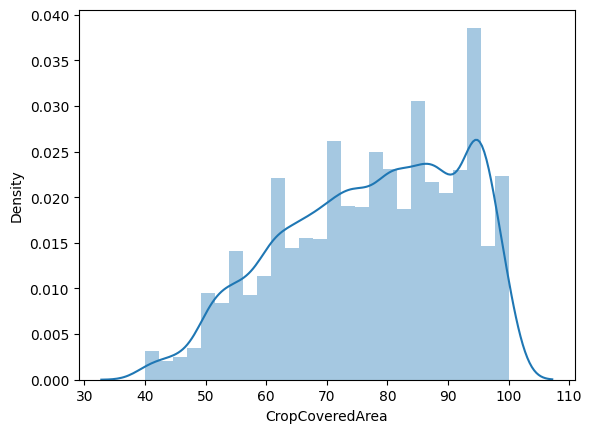

In [19]:
sns.distplot(train['CropCoveredArea'],hist=True)


### CHeight

In [20]:
train['CHeight'].value_counts()

,count
CHeight,
74,463
83,105
67,104
39,102
72,97
...,...
186,4
173,4
170,4


<Axes: xlabel='CHeight', ylabel='Density'>

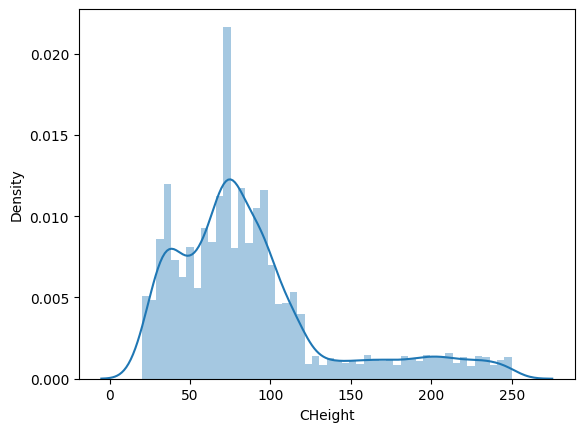

In [21]:
sns.distplot(train['CHeight'],hist=True)


In [22]:
train['log_CHeight'] = np.log(train['CHeight'])
test['log_CHeight'] = np.log(test['CHeight'])

###  WaterCov

In [23]:
train['WaterCov'].value_counts()

,count
WaterCov,
40,248
48,218
50,209
47,209
43,205
...,...
22,71
35,66
28,65


<Axes: xlabel='WaterCov', ylabel='Density'>

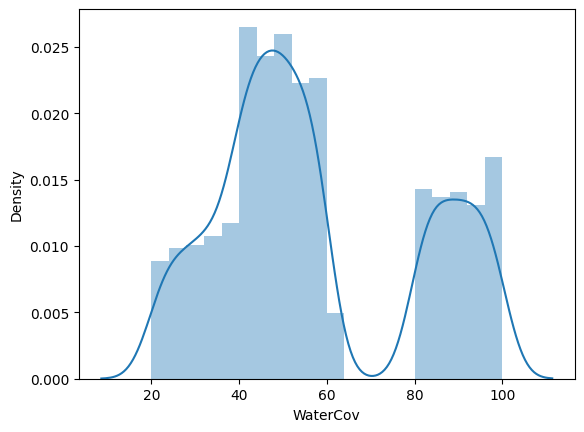

In [24]:
sns.distplot(train['WaterCov'],hist=True)

### ExpYield

In [25]:
train['ExpYield'].value_counts()

,count
ExpYield,
10,689
17,656
11,648
12,640
15,601
20,524
13,381
14,376
9,320


<Axes: xlabel='ExpYield', ylabel='Density'>

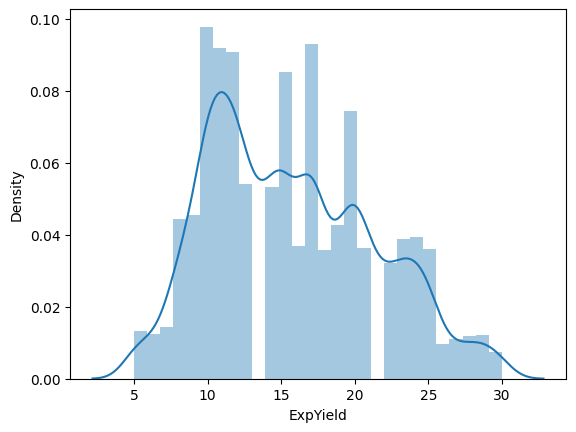

In [26]:
sns.distplot(train['ExpYield'],hist=True)

### IrriCount

In [27]:
train['IrriCount'].value_counts()

,count
IrriCount,
4,1932
3,1860
2,1453
5,1288
6,780
1,575


Text(29.597222222222214, 0.5, 'Count')

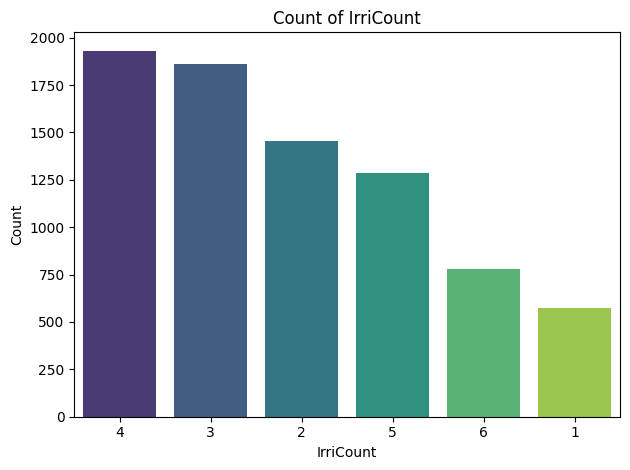

In [28]:
sns.countplot(data=train, x='IrriCount', palette='viridis', order=train['IrriCount'].value_counts().index)

# Add labels and title
plt.title('Count of IrriCount')
plt.xlabel('IrriCount')
plt.tight_layout()
plt.ylabel('Count')

## Categorical Features


### Crop

In [29]:
train['Crop'].value_counts()

,count
Crop,
Paddy,2268
Cotton,1692
Maize,1384
Bengal Gram,938
Groundnut,768
Chillies,614
Red Gram,224


Text(29.597222222222214, 0.5, 'Count')

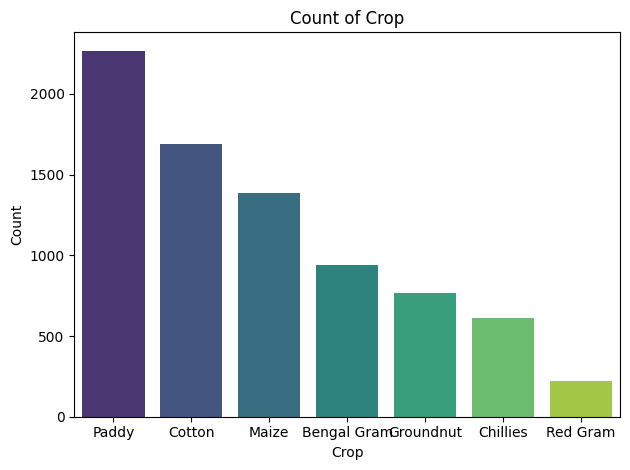

In [30]:
sns.countplot(data=train, x='Crop', palette='viridis', order=train['Crop'].value_counts().index)

# Add labels and title
plt.title('Count of Crop')
plt.xlabel('Crop')
plt.tight_layout()
plt.ylabel('Count')

### State

In [31]:
train['State'].value_counts()

,count
State,
Telangana,7888


- We are going to drop this column as it will have no influence to the model

In [32]:
train.drop('State', axis=1, inplace=True)
test.drop('State', axis=1, inplace=True)

### District

In [33]:
train['District'].value_counts()

,count
District,
Adilabad,1770
Nalgonda,1386
Mahabubabad,1314
Nirmal,1244
Medak,1210
Mahabubnagar,655
Narayanpet,203
Nagarkurnool,47
Warangal,20


Text(29.597222222222214, 0.5, 'Count')

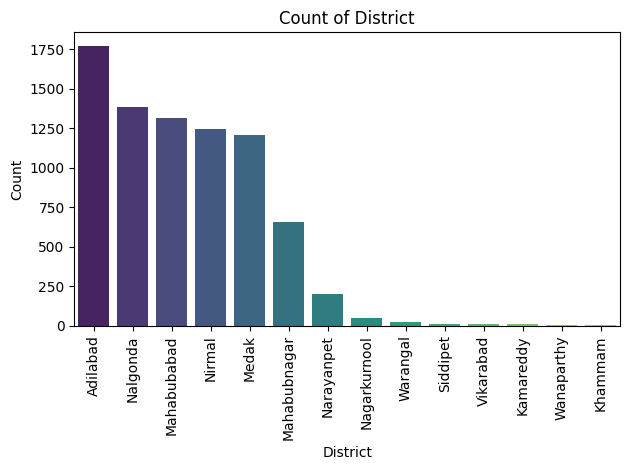

In [34]:
sns.countplot(data=train, x='District', palette='viridis', order=train['District'].value_counts().index)

# Add labels and title
plt.title('Count of District')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('Count')

### Sub-District

In [35]:
train['Sub-District'].value_counts()

,count
Sub-District,
Utnur,470
Inderavelly,320
Havelighanpur,305
Gudur,270
Bhainsa,266
...,...
Devarkadra,3
Narsapur,2
Singareni,1


### CNext

In [36]:
train['CNext'].value_counts()

,count
CNext,
Pea,1355
Wheat,1326
Maize,1212
Sorghum,953
Lentil,913
Soybean,665
Mustard,445
Rice,405
Onion,321


Text(29.597222222222214, 0.5, 'Count')

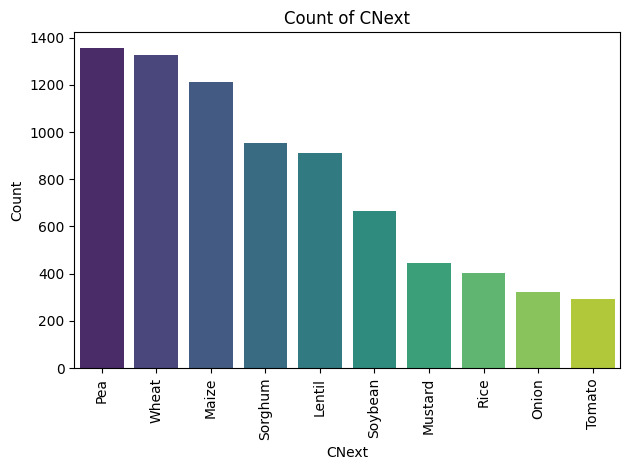

In [37]:
sns.countplot(data=train, x='CNext', palette='viridis', order=train['CNext'].value_counts().index)

# Add labels and title
plt.title('Count of CNext')
plt.xlabel('CNext')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('Count')

### CTransp

In [38]:
train['CTransp'].value_counts()

,count
CTransp,
Transplanting,2268
Drilling,1908
Broadcasting,1879
Seed Drilling,1833


Text(29.597222222222214, 0.5, 'Count')

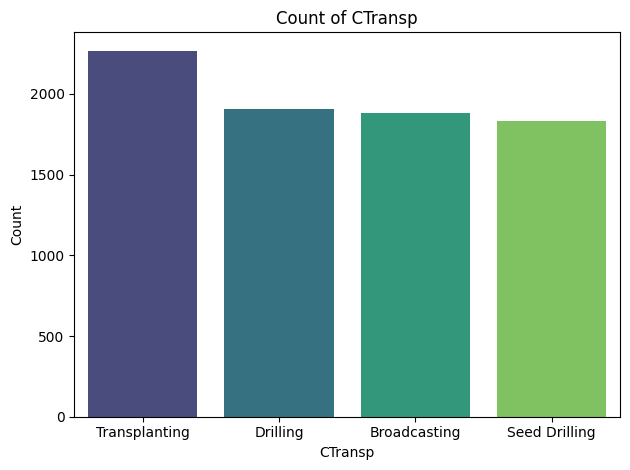

In [39]:
sns.countplot(data=train, x='CTransp', palette='viridis', order=train['CTransp'].value_counts().index)

# Add labels and title
plt.title('Count of CTransp')
plt.xlabel('CTransp')
plt.tight_layout()
plt.ylabel('Count')

### IrriType

In [40]:
train['IrriType'].value_counts()

,count
IrriType,
Drip,2871
Sprinkler,2282
Flood,2268
Surface,467


Text(29.597222222222214, 0.5, 'Count')

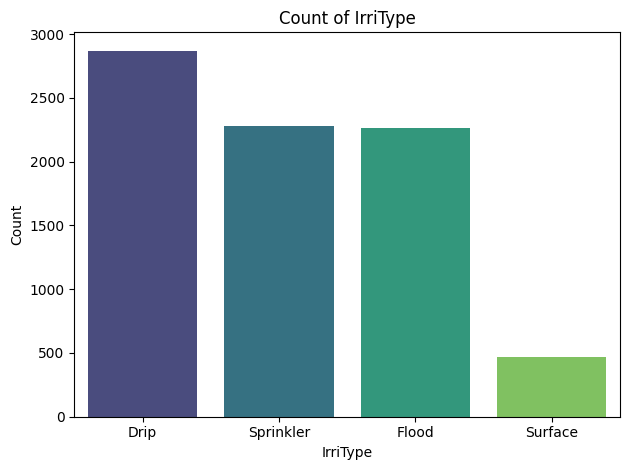

In [41]:
sns.countplot(data=train, x='IrriType', palette='viridis', order=train['IrriType'].value_counts().index)

# Add labels and title
plt.title('Count of IrriType')
plt.xlabel('IrriType')
plt.tight_layout()
plt.ylabel('Count')

### IrriSource

In [42]:
train['IrriSource'].value_counts()

,count
IrriSource,
Groundwater,3338
Canal,3189
Rainfed,1251
Well,57
Tubewell,53


Text(29.597222222222214, 0.5, 'Count')

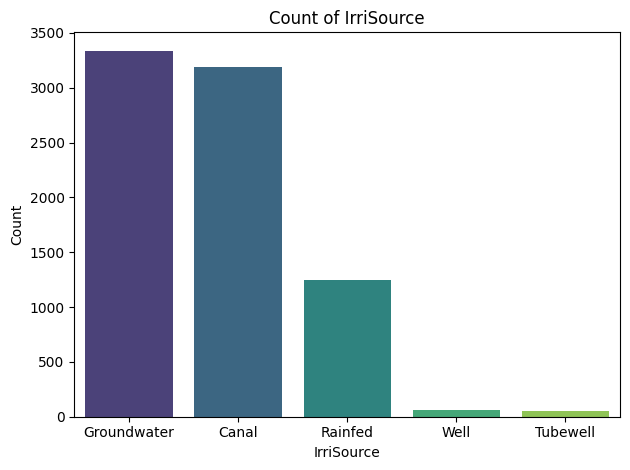

In [43]:
sns.countplot(data=train, x='IrriSource', palette='viridis', order=train['IrriSource'].value_counts().index)

# Add labels and title
plt.title('Count of IrriSource')
plt.xlabel('IrriSource')
plt.tight_layout()
plt.ylabel('Count')

### Season

In [44]:
train['Season'].value_counts()

,count
Season,
Rabi,6180
Kharif,1708


Text(29.597222222222214, 0.5, 'Count')

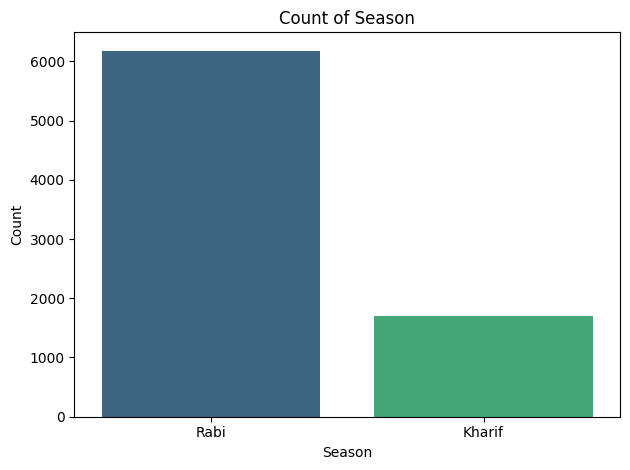

In [45]:
sns.countplot(data=train, x='Season', palette='viridis', order=train['Season'].value_counts().index)

# Add labels and title
plt.title('Count of Season')
plt.xlabel('Season')
plt.tight_layout()
plt.ylabel('Count')

In [46]:
##dropping the geometry column because they will not be used for modeling
train.drop('geometry', axis=1, inplace=True)
test.drop('geometry', axis=1, inplace=True)

## Date Features


### SDate and HDate

In [47]:
from datetime import datetime
train['SDate'] = pd.to_datetime(train['SDate'])
test['SDate'] = pd.to_datetime(test['SDate'])

train['HDate'] = pd.to_datetime(train['HDate'])
test['HDate'] = pd.to_datetime(test['HDate'])


In [48]:
#duration
train['Duration'] = ((train['HDate']) - (train['SDate'])).dt.days
test['Duration'] = ((test['HDate']) - (test['SDate'])).dt.days

#train
train['SDate_year'] = train['SDate'].dt.year
train['SDate_month'] = train['SDate'].dt.month
train['SDate_day'] = train['SDate'].dt.day
train['SDate_quater'] = train['SDate'].dt.quarter

#test
test['SDate_year'] = test['SDate'].dt.year
test['SDate_month'] = test['SDate'].dt.month
test['SDate_day'] = test['SDate'].dt.day
test['SDate_quater'] = test['SDate'].dt.quarter

#train
train['HDate_year'] = train['HDate'].dt.year
train['HDate_month'] = train['HDate'].dt.month
train['HDate_day'] = train['HDate'].dt.day
train['HDate_quater'] = train['HDate'].dt.quarter

#test
test['HDate_year'] = test['HDate'].dt.year
test['HDate_month'] = test['HDate'].dt.month
test['HDate_day'] = test['HDate'].dt.day
test['HDate_quater'] = test['HDate'].dt.quarter

In [49]:
#droping the date features
train.drop(['SDate', 'HDate'], axis=1, inplace=True)
test.drop(['SDate', 'HDate'], axis=1, inplace=True)

## Category

In [50]:
train['category'].value_counts()

,count
category,
Healthy,6506
Pests,485
Diseased,474
Stressed,423


Text(29.597222222222214, 0.5, 'Count')

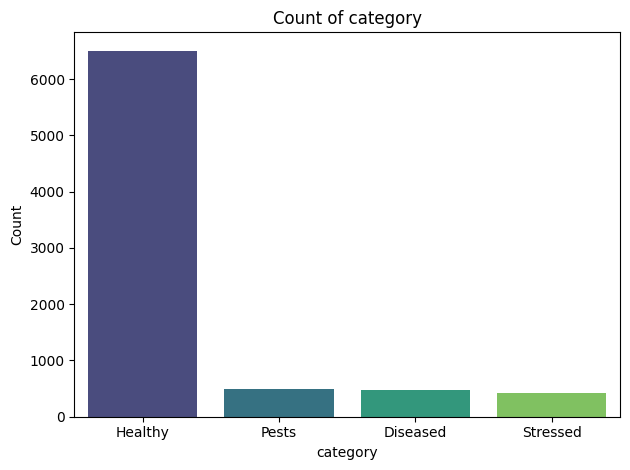

In [51]:
sns.countplot(data=train, x='category', palette='viridis', order=train['category'].value_counts().index)

# Add labels and title
plt.title('Count of category')
plt.xlabel('category')
plt.tight_layout()
plt.ylabel('Count')

##  Feature Engineering and variable interaction

In [52]:
#crop sequence
train['CropSequence'] = train['CLast'] + '-' + train['Crop'] + '-' + train['CNext']
test['CropSequence'] = test['CLast'] + '-' + test['Crop'] + '-' + test['CNext']

#crop biomass
train['CropBiomass'] = train['CropCoveredArea'] * train['CHeight']
test['CropBiomass'] = test['CropCoveredArea'] * test['CHeight']

#Water Stress Index
train['WaterStressIndex'] = train['WaterCov'] / train['CropCoveredArea']
test['WaterStressIndex'] = test['WaterCov'] / test['CropCoveredArea']


train['Crop_IrriType'] = train['Crop'] + '_' + train['IrriType']
test['Crop_IrriType'] = test['Crop'] + '_' + test['IrriType']



train['Crop_Season'] = train['Crop'] + '_' + train['Season']
test['Crop_Season'] = test['Crop'] + '_' + test['Season']

train['Crop_District'] = train['Crop'] + '_' + train['District']
test['Crop_District'] = test['Crop'] + '_' + test['District']




In [53]:
train['log_cropbiomass'] = np.log(train['CropBiomass'])

In [54]:
train.shape,test.shape

((7888, 33), (2718, 31))

## Encoding

In [55]:

# CONCATENATING BOTH THE TEST AND TRAIN FOR EASY DATA MANIPULATON
ntrain = train.shape[0]
ntest = test.shape[0]
data = pd.concat((train, test)).reset_index(drop=True)

In [56]:
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
cat_features

['category',
 'Crop',
 'District',
 'Sub-District',
 'CNext',
 'CLast',
 'CTransp',
 'IrriType',
 'IrriSource',
 'Season',
 'CropSequence',
 'Crop_IrriType',
 'Crop_Season',
 'Crop_District']

In [57]:
data[cat_features].apply(lambda x: len(x.unique()))

,0
category,5
Crop,7
District,16
Sub-District,151
CNext,11
CLast,10
CTransp,4
IrriType,4
IrriSource,5
Season,2


### label encoding


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_cols = ['SDate_year','SDate_quater','HDate_year', 'IrriType', 'IrriSource', 'Season']

for col in le_cols:
    data[col] = le.fit_transform(data[col])

## Frequency encoding

In [60]:
#feature encoding
col = ['Crop','District','Sub-District','CNext','CLast','CTransp','CropSequence', 'Crop_IrriType', 'Crop_Season', 'Crop_District'
       ,'SDate_year', 'SDate_month', 'SDate_day',
       'SDate_quater', 'HDate_year', 'HDate_month', 'HDate_day',
       'HDate_quater']

for feature in col:
    freq = data[feature].value_counts(normalize=True)
    data[feature] = data[feature].map(freq)


In [61]:
# Separate train and test data from the combined dataframe
train = data[:ntrain]
test = data[ntrain:]

# Check the shapes of the split dataset
train.shape, test.shape


((7888, 33), (2718, 33))

## Add statistical Information on the Numerical Columns

In [62]:
Num_cols = ['CropCoveredArea', 'CHeight', 'WaterCov', 'ExpYield']


In [63]:
def add_stats(train, test, feats):
    # Store the current number of columns in the DataFrame
    train_before = train.shape[1]
    test_before = test.shape[1]

    # Calculate the minimum value across the specified columns for each row
    train['f_min'] = train[feats].fillna(0).min(axis=1)
    test['f_min'] = test[feats].fillna(0).min(axis=1)

    # Calculate the maximum value across the specified columns for each row
    train['f_max'] = train[feats].fillna(0).max(axis=1)
    test['f_max'] = test[feats].fillna(0).max(axis=1)

    # Calculate the mean (average) value across the specified columns for each row
    train['f_mean'] = train[feats].fillna(0).mean(axis=1)
    test['f_mean'] = test[feats].fillna(0).mean(axis=1)

    # Calculate the standard deviation (spread) across the specified columns for each row
    train['f_sd'] = train[feats].fillna(0).std(axis=1)
    test['f_sd'] = test[feats].fillna(0).std(axis=1)

    # Calculate the median (middle value) across the specified columns for each row
    train['f_median'] = train[feats].fillna(0).median(axis=1)
    test['f_median'] = test[feats].fillna(0).median(axis=1)

    # Calculate the sum of values across the specified columns for each row
    train['f_sum'] = train[feats].fillna(0).sum(axis=1)
    test['f_sum'] = test[feats].fillna(0).sum(axis=1)

    # Calculate the skewness (asymmetry) across the specified columns for each row
    train['f_skew'] = train[feats].fillna(0).skew(axis=1)
    test['f_skew'] = test[feats].fillna(0).skew(axis=1)

    # Store the updated number of columns after adding new features
    train_after = train.shape[1]
    test_after = test.shape[1]

    # Get a list of the names of newly added columns
    new_cols_train = train.iloc[:, train_before:train_after].columns.tolist()
    new_cols_test = test.iloc[:, test_before:test_after].columns.tolist()

    # Return the updated DataFrame with new features and the list of new columns
    return train, test, new_cols_train, new_cols_test


feats = Num_cols

# Apply the add_stats function to your data
train, test, new_cols_train, new_cols_test = add_stats(train, test, feats)

In [64]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 2200
train.head()

,FarmID,category,Crop,District,Sub-District,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,log_CHeight,Duration,SDate_year,SDate_month,SDate_day,SDate_quater,HDate_year,HDate_month,HDate_day,HDate_quater,CropSequence,CropBiomass,WaterStressIndex,Crop_IrriType,Crop_Season,Crop_District,log_cropbiomass,f_min,f_max,f_mean,f_sd,f_median,f_sum,f_skew
0,1326576,Healthy,0.281162,0.167641,0.003017,97,54,0.16387,0.163587,0.281162,1,1,4,87,17,1,3.988984,141,0.984631,0.239676,0.033754,0.550820,0.775316,0.149915,0.034320,0.268244,0.155195,5238,0.896907,0.281162,0.207241,0.109655,8.563695,17,97,63.75,36.178953,70.5,255,-0.757028
1,1326577,Healthy,0.281162,0.167641,0.003017,82,58,0.16387,0.163587,0.281162,1,0,5,94,15,1,4.060443,165,0.984631,0.239676,0.032057,0.550820,0.775316,0.149915,0.035263,0.268244,0.155195,4756,1.146341,0.281162,0.207241,0.109655,8.467162,15,94,62.25,34.874776,70.0,249,-1.035064
2,1326578,Healthy,0.281162,0.167641,0.003017,92,91,0.16387,0.163587,0.281162,1,0,3,99,20,1,4.510860,131,0.984631,0.163398,0.034886,0.550820,0.775316,0.149915,0.030737,0.268244,0.155195,8372,1.076087,0.281162,0.207241,0.109655,9.032648,20,99,75.50,37.170777,91.5,302,-1.944015
3,1331836,Diseased,0.281162,0.167641,0.003017,91,52,0.16387,0.163587,0.281162,1,0,5,92,16,1,3.951244,632,0.984631,0.037432,0.117669,0.109749,0.775316,0.093626,0.091269,0.244673,0.155195,4732,1.010989,0.281162,0.207241,0.109655,8.462103,16,92,62.75,36.307713,71.5,251,-0.777877
4,1326579,Diseased,0.281162,0.167641,0.003017,94,55,0.16387,0.163587,0.281162,1,0,5,97,20,1,4.007333,159,0.984631,0.163398,0.098623,0.550820,0.775316,0.088441,0.036300,0.268244,0.155195,5170,1.031915,0.281162,0.207241,0.109655,8.550628,20,97,66.50,36.428011,74.5,266,-0.729500


In [65]:
train.to_csv('train_fin.csv', index=False)
test.to_csv('test_fin.csv', index=False)